# 주제 : 성별과 임금의 상관관계

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager


In [2]:
for font in font_manager.fontManager.ttflist:
    if 'AppleMyungjo' in font.name:
        print(font.name,font.fname)
plt.rcParams['font.family'] = 'AppleMyungjo'

AppleMyungjo /System/Library/Fonts/Supplemental/AppleMyungjo.ttf


In [3]:
df_wage = pd.read_csv('통계검색자료.csv',encoding='euc-kr')
df_wage.head(10)

기관명           기관유형  \
0  (사)남북교류협력지원협회         기타공공기관   
1  (사)남북교류협력지원협회         기타공공기관   
2    (재)APEC기후센터         기타공공기관   
3    (재)APEC기후센터         기타공공기관   
4    (재)국제원산지정보원         기타공공기관   
5    (재)국제원산지정보원         기타공공기관   
6    (재)예술경영지원센터         기타공공기관   
7    (재)예술경영지원센터         기타공공기관   
8    (재)우체국금융개발원   준정부기관(위탁집행형)   
9    (재)우체국금융개발원   준정부기관(위탁집행형)   

                                                  항목   2017   2018   2019  \
0   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  59476  62167  61820   
1   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  35775  36414  43144   
2   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  62366  64269  64296   
3   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  54040  55872  54598   
4   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  46792  49430  53394   
5   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  43444  44302  46314   
6   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  53712  55945  57327   
7   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  40458  42319  44382   
8   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  61292  60163  54734   
9   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  51151  49840  48300   

    2020   2021  단위 부설기관여부  
0  60476  58462   명      N  
1  42021  44514   명      N  
2  69988  70566   명      N  
3  61573  60202   명      N  
4  52130  46714   명      N  
5  46659  40483   명      N  
6  59821  59484   명      N  
7  48459  51822   명      N  
8  55869  56372   명      N  
9  49410  49855   명      N

In [4]:
df_wage['항목']

0       직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...
1       직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...
2       직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...
3       직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...
4       직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...
                             ...                        
735     직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...
736     직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...
737     직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...
738     직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...
739     직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...
Name: 항목, Length: 740, dtype: object

In [5]:
df_wage=df_wage.drop('단위',axis=1)
df_wage=df_wage.drop('부설기관여부',axis=1)
df_wage=df_wage.drop('기관유형',axis=1)

In [6]:
df_wage

기관명                                                 항목   2017  \
0    (사)남북교류협력지원협회   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  59476   
1    (사)남북교류협력지원협회   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  35775   
2      (재)APEC기후센터   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  62366   
3      (재)APEC기후센터   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  54040   
4      (재)국제원산지정보원   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  46792   
..             ...                                                ...    ...   
735    해양수산과학기술진흥원   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  60677   
736         해양환경공단   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  70774   
737         해양환경공단   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  64651   
738         환경보전협회   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  62009   
739         환경보전협회   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 1인당 평균 보수액...  47507   

      2018   2019   2020   2021  
0    62167  61820  60476  58462  
1    36414  43144  42021  44514  
2    64269  64296  69988  70566  
3    55872  54598  61573  60202  
4    49430  53394  52130  46714  
..     ...    ...    ...    ...  
735  62007  63998  65103  62513  
736  68769  67717  71595  65231  
737  57586  59613  65319  64709  
738  57128  54830  53826  55080  
739  45517  46617  46425  47726  

[740 rows x 7 columns]

In [7]:
for i in range(0,740):
    df_wage.loc[i,'항목'] = df_wage.loc[i,'항목'][-4:]
df_wage

기관명    항목   2017   2018   2019   2020   2021
0    (사)남북교류협력지원협회  (남성)  59476  62167  61820  60476  58462
1    (사)남북교류협력지원협회  (여성)  35775  36414  43144  42021  44514
2      (재)APEC기후센터  (남성)  62366  64269  64296  69988  70566
3      (재)APEC기후센터  (여성)  54040  55872  54598  61573  60202
4      (재)국제원산지정보원  (남성)  46792  49430  53394  52130  46714
..             ...   ...    ...    ...    ...    ...    ...
735    해양수산과학기술진흥원  (여성)  60677  62007  63998  65103  62513
736         해양환경공단  (남성)  70774  68769  67717  71595  65231
737         해양환경공단  (여성)  64651  57586  59613  65319  64709
738         환경보전협회  (남성)  62009  57128  54830  53826  55080
739         환경보전협회  (여성)  47507  45517  46617  46425  47726

[740 rows x 7 columns]

In [8]:
df_wage.dropna(inplace=True) # axis=0,how=any
df_wage

기관명    항목   2017   2018   2019   2020   2021
0    (사)남북교류협력지원협회  (남성)  59476  62167  61820  60476  58462
1    (사)남북교류협력지원협회  (여성)  35775  36414  43144  42021  44514
2      (재)APEC기후센터  (남성)  62366  64269  64296  69988  70566
3      (재)APEC기후센터  (여성)  54040  55872  54598  61573  60202
4      (재)국제원산지정보원  (남성)  46792  49430  53394  52130  46714
..             ...   ...    ...    ...    ...    ...    ...
735    해양수산과학기술진흥원  (여성)  60677  62007  63998  65103  62513
736         해양환경공단  (남성)  70774  68769  67717  71595  65231
737         해양환경공단  (여성)  64651  57586  59613  65319  64709
738         환경보전협회  (남성)  62009  57128  54830  53826  55080
739         환경보전협회  (여성)  47507  45517  46617  46425  47726

[740 rows x 7 columns]

In [9]:
df_wage.index += 1
df_wage

기관명    항목   2017   2018   2019   2020   2021
1    (사)남북교류협력지원협회  (남성)  59476  62167  61820  60476  58462
2    (사)남북교류협력지원협회  (여성)  35775  36414  43144  42021  44514
3      (재)APEC기후센터  (남성)  62366  64269  64296  69988  70566
4      (재)APEC기후센터  (여성)  54040  55872  54598  61573  60202
5      (재)국제원산지정보원  (남성)  46792  49430  53394  52130  46714
..             ...   ...    ...    ...    ...    ...    ...
736    해양수산과학기술진흥원  (여성)  60677  62007  63998  65103  62513
737         해양환경공단  (남성)  70774  68769  67717  71595  65231
738         해양환경공단  (여성)  64651  57586  59613  65319  64709
739         환경보전협회  (남성)  62009  57128  54830  53826  55080
740         환경보전협회  (여성)  47507  45517  46617  46425  47726

[740 rows x 7 columns]

In [10]:
df_wage.isnull().sum()

기관명     0
항목      0
2017    0
2018    0
2019    0
2020    0
2021    0
dtype: int64

In [11]:
df_man = df_wage[df_wage['항목']=='(남성)'].reset_index()
df_man.index +=1
df_man

index            기관명    항목   2017   2018   2019   2020   2021
1        1  (사)남북교류협력지원협회  (남성)  59476  62167  61820  60476  58462
2        3    (재)APEC기후센터  (남성)  62366  64269  64296  69988  70566
3        5    (재)국제원산지정보원  (남성)  46792  49430  53394  52130  46714
4        7    (재)예술경영지원센터  (남성)  53712  55945  57327  59821  59484
5        9    (재)우체국금융개발원  (남성)  61292  60163  54734  55869  56372
..     ...            ...   ...    ...    ...    ...    ...    ...
366    731    한전원자력연료주식회사  (남성)  72692  74471  76225  82436  60700
367    733        항공안전기술원  (남성)  83324  80098  81164  85746  82862
368    735    해양수산과학기술진흥원  (남성)  78532  81296  81294  84110  79184
369    737         해양환경공단  (남성)  70774  68769  67717  71595  65231
370    739         환경보전협회  (남성)  62009  57128  54830  53826  55080

[370 rows x 8 columns]

In [12]:
df_wom = df_wage[df_wage['항목']=='(여성)'].reset_index()
df_wom.index += 1 
df_wom

index            기관명    항목   2017   2018   2019   2020   2021
1        2  (사)남북교류협력지원협회  (여성)  35775  36414  43144  42021  44514
2        4    (재)APEC기후센터  (여성)  54040  55872  54598  61573  60202
3        6    (재)국제원산지정보원  (여성)  43444  44302  46314  46659  40483
4        8    (재)예술경영지원센터  (여성)  40458  42319  44382  48459  51822
5       10    (재)우체국금융개발원  (여성)  51151  49840  48300  49410  49855
..     ...            ...   ...    ...    ...    ...    ...    ...
366    732    한전원자력연료주식회사  (여성)  55404  55201  57839  65301  60700
367    734        항공안전기술원  (여성)  57985  60876  64131  65308  67614
368    736    해양수산과학기술진흥원  (여성)  60677  62007  63998  65103  62513
369    738         해양환경공단  (여성)  64651  57586  59613  65319  64709
370    740         환경보전협회  (여성)  47507  45517  46617  46425  47726

[370 rows x 8 columns]

In [13]:
df_man.describe()

index           2017           2018           2019           2020  \
count  370.00000     370.000000     370.000000     370.000000     370.000000   
mean   370.00000   68522.694595   70717.545946   71542.732432   73899.770270   
std    213.90808   22656.374143   20627.809953   19348.686664   17308.956448   
min      1.00000       0.000000       0.000000       0.000000       0.000000   
25%    185.50000   59127.000000   60315.250000   60540.500000   61998.250000   
50%    370.00000   69671.000000   70934.000000   70997.500000   72472.500000   
75%    554.50000   82274.500000   82681.000000   83153.000000   84804.250000   
max    739.00000  123020.000000  126452.000000  125700.000000  128288.000000   

                2021  
count     370.000000  
mean    71784.475676  
std     18735.599855  
min         0.000000  
25%     60753.000000  
50%     71673.500000  
75%     83099.000000  
max    123843.000000

In [14]:
df_wom.describe()

index           2017           2018           2019           2020  \
count  370.00000     370.000000     370.000000     370.000000     370.000000   
mean   371.00000   53678.083784   55823.040541   56818.735135   59325.670270   
std    213.90808   17504.781645   15807.595290   14691.864362   13271.149564   
min      2.00000       0.000000       0.000000       0.000000       0.000000   
25%    186.50000   46231.000000   48640.750000   48456.500000   49769.500000   
50%    371.00000   54951.000000   55861.500000   56477.500000   58336.000000   
75%    555.50000   63370.000000   64602.500000   65876.500000   67337.000000   
max    740.00000  100677.000000  102177.000000  104076.000000  101441.000000   

               2021  
count    370.000000  
mean   58581.440541  
std    14634.344872  
min        0.000000  
25%    50074.250000  
50%    58587.000000  
75%    67117.750000  
max    96823.000000

In [15]:
man_mean = ['68522.694595','70717.545946','71542.732432','73899.770270','71784.475676']

In [16]:
wom_mean = ['53678.083784','55823.040541','56818.735135','59325.670270','58581.440541']

In [17]:
# wage_mean =[['2017',68522.694595,53678.083784,0],
#                 ['2018',70717.545946,55823.040541,0],
#                 ['2019',71542.732432,56818.735135,0],
#                 ['2020',73899.770270,59325.670270,0],
#                ['2021',71784.475676,58581.440541,0]]
# columns = ['년도', '남자평균연봉','여자평균연봉','영']
# df_mean = pd.DataFrame(wage_mean,columns=columns)
# df_mean

In [18]:
wage_mean =[
                ['2017',68522.694595,'남자',0],
                ['2018',70717.545946,'남자',0],
                ['2019',71542.732432,'남자',0],
                ['2020',73899.770270,'남자',0],
                ['2021',71784.475676,'남자',0],
                ['2017',53678.083784,'여자',0],
                ['2018',55823.040541,'여자',0],
                ['2019',56818.735135,'여자',0],
                ['2020',59325.670270,'여자',0],
                ['2021',58581.440541,'여자',0]]
columns = ['년도', '평균연봉', '성별','영']
df_mean = pd.DataFrame(wage_mean,columns=columns)
df_mean

년도          평균연봉  성별  영
0  2017  68522.694595  남자  0
1  2018  70717.545946  남자  0
2  2019  71542.732432  남자  0
3  2020  73899.770270  남자  0
4  2021  71784.475676  남자  0
5  2017  53678.083784  여자  0
6  2018  55823.040541  여자  0
7  2019  56818.735135  여자  0
8  2020  59325.670270  여자  0
9  2021  58581.440541  여자  0

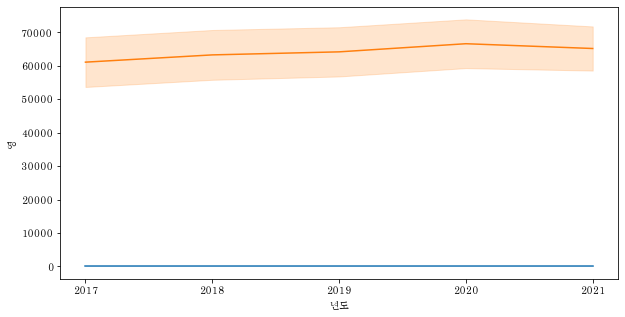

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(x='년도',y='영',data=df_mean)
sns.lineplot(x='년도',y='평균연봉',data=df_mean)
plt.savefig("남녀평균연봉_라인.png", dpi = 400)

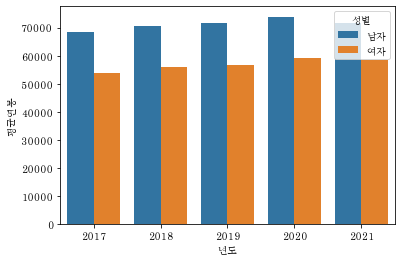

In [20]:
sns.barplot(x='년도',y='평균연봉',hue='성별',data=df_mean)
plt.savefig("남녀평균연봉_막대.png", dpi = 400)
plt.show()

In [21]:
# sns.barplot(x='년도',y='',hue='항목',data=df_mean)
# plt.show()

In [22]:
df_sangshi = pd.read_csv('통계검색자료(근속연수).csv',encoding='euc-kr')
df_sangshi

기관명           기관유형  \
0    (사)남북교류협력지원협회         기타공공기관   
1    (사)남북교류협력지원협회         기타공공기관   
2      (재)APEC기후센터         기타공공기관   
3      (재)APEC기후센터         기타공공기관   
4      (재)국제원산지정보원         기타공공기관   
..             ...            ...   
735    해양수산과학기술진흥원   준정부기관(위탁집행형)   
736         해양환경공단      공기업(준시장형)   
737         해양환경공단      공기업(준시장형)   
738         환경보전협회         기타공공기관   
739         환경보전협회         기타공공기관   

                                                  항목  2016    2017   2018  \
0     직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 평균근속연수 (남성)   0.0   75.00   83.0   
1     직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 평균근속연수 (여성)   0.0   57.00   56.0   
2     직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 평균근속연수 (남성)   0.0   54.00   69.0   
3     직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 평균근속연수 (여성)   0.0   58.00   64.0   
4     직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 평균근속연수 (남성)   0.0   55.08   68.4   
..                                               ...   ...     ...    ...   
735   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 평균근속연수 (여성)   0.0   68.00   71.0   
736   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 평균근속연수 (남성)   0.0  142.00  136.0   
737   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 평균근속연수 (여성)   0.0  116.00  106.0   
738   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 평균근속연수 (남성)   0.0  129.00  126.0   
739   직원 평균보수 현황 > 직원평균보수 > 정규직(일반정규직) > 평균근속연수 (여성)   0.0   93.00   93.0   

       2019   2020   2021  단위 부설기관여부  
0     90.00   97.0  108.0   명      N  
1     68.00   74.0   81.0   명      N  
2     81.00   97.0  109.0   명      N  
3     76.00   93.0  104.0   명      N  
4     72.26   80.0   92.0   명      N  
..      ...    ...    ...  ..    ...  
735   77.00   80.0   93.0   명      N  
736  142.00  147.0  150.0   명      N  
737  120.00  128.0  136.0   명      N  
738  114.00  106.0  118.0   명      N  
739   89.00   91.0  103.0   명      N  

[740 rows x 11 columns]

In [23]:
df_sangshi=df_sangshi.drop('단위',axis=1)
df_sangshi=df_sangshi.drop('부설기관여부',axis=1)
df_sangshi=df_sangshi.drop('기관유형',axis=1)
df_sangshi=df_sangshi.drop('2016',axis=1)
for i in range(0,740):
    df_sangshi.loc[i,'항목'] = df_sangshi.loc[i,'항목'][-4:]
df_sangshi

기관명    항목    2017   2018    2019   2020   2021
0    (사)남북교류협력지원협회  (남성)   75.00   83.0   90.00   97.0  108.0
1    (사)남북교류협력지원협회  (여성)   57.00   56.0   68.00   74.0   81.0
2      (재)APEC기후센터  (남성)   54.00   69.0   81.00   97.0  109.0
3      (재)APEC기후센터  (여성)   58.00   64.0   76.00   93.0  104.0
4      (재)국제원산지정보원  (남성)   55.08   68.4   72.26   80.0   92.0
..             ...   ...     ...    ...     ...    ...    ...
735    해양수산과학기술진흥원  (여성)   68.00   71.0   77.00   80.0   93.0
736         해양환경공단  (남성)  142.00  136.0  142.00  147.0  150.0
737         해양환경공단  (여성)  116.00  106.0  120.00  128.0  136.0
738         환경보전협회  (남성)  129.00  126.0  114.00  106.0  118.0
739         환경보전협회  (여성)   93.00   93.0   89.00   91.0  103.0

[740 rows x 7 columns]

In [24]:
df_wage.dropna(inplace=True) # axis=0,how=any
df_wage

기관명    항목   2017   2018   2019   2020   2021
1    (사)남북교류협력지원협회  (남성)  59476  62167  61820  60476  58462
2    (사)남북교류협력지원협회  (여성)  35775  36414  43144  42021  44514
3      (재)APEC기후센터  (남성)  62366  64269  64296  69988  70566
4      (재)APEC기후센터  (여성)  54040  55872  54598  61573  60202
5      (재)국제원산지정보원  (남성)  46792  49430  53394  52130  46714
..             ...   ...    ...    ...    ...    ...    ...
736    해양수산과학기술진흥원  (여성)  60677  62007  63998  65103  62513
737         해양환경공단  (남성)  70774  68769  67717  71595  65231
738         해양환경공단  (여성)  64651  57586  59613  65319  64709
739         환경보전협회  (남성)  62009  57128  54830  53826  55080
740         환경보전협회  (여성)  47507  45517  46617  46425  47726

[740 rows x 7 columns]

In [25]:
df_man_sangshi = df_sangshi[df_sangshi['항목']=='(남성)'].reset_index()
df_man_sangshi.index +=1
df_man_sangshi

index            기관명    항목    2017   2018    2019   2020   2021
1        0  (사)남북교류협력지원협회  (남성)   75.00   83.0   90.00   97.0  108.0
2        2    (재)APEC기후센터  (남성)   54.00   69.0   81.00   97.0  109.0
3        4    (재)국제원산지정보원  (남성)   55.08   68.4   72.26   80.0   92.0
4        6    (재)예술경영지원센터  (남성)   65.00   77.0   88.00  101.0  113.0
5        8    (재)우체국금융개발원  (남성)  151.00  131.0  133.00  142.0  154.0
..     ...            ...   ...     ...    ...     ...    ...    ...
366    730    한전원자력연료주식회사  (남성)  170.00  176.0  177.00  177.0  177.0
367    732        항공안전기술원  (남성)   27.00   37.0   42.00   52.0   61.0
368    734    해양수산과학기술진흥원  (남성)   87.00   86.0  100.00  108.0  118.0
369    736         해양환경공단  (남성)  142.00  136.0  142.00  147.0  150.0
370    738         환경보전협회  (남성)  129.00  126.0  114.00  106.0  118.0

[370 rows x 8 columns]

In [26]:
df_wom_sangshi = df_sangshi[df_sangshi['항목']=='(여성)'].reset_index()
df_wom_sangshi.index +=1
df_wom_sangshi

index            기관명    항목    2017    2018    2019   2020   2021
1        1  (사)남북교류협력지원협회  (여성)   57.00   56.00   68.00   74.0   81.0
2        3    (재)APEC기후센터  (여성)   58.00   64.00   76.00   93.0  104.0
3        5    (재)국제원산지정보원  (여성)   54.12   60.36   64.69   79.0   91.0
4        7    (재)예술경영지원센터  (여성)   65.00   77.00   85.00  103.0  115.0
5        9    (재)우체국금융개발원  (여성)  108.00   98.00  105.00  118.0  130.0
..     ...            ...   ...     ...     ...     ...    ...    ...
366    731    한전원자력연료주식회사  (여성)  130.00  141.00  138.00  138.0  138.0
367    733        항공안전기술원  (여성)   22.00   31.00   39.00   42.0   54.0
368    735    해양수산과학기술진흥원  (여성)   68.00   71.00   77.00   80.0   93.0
369    737         해양환경공단  (여성)  116.00  106.00  120.00  128.0  136.0
370    739         환경보전협회  (여성)   93.00   93.00   89.00   91.0  103.0

[370 rows x 8 columns]

In [27]:
df_man_sangshi.describe()

index        2017        2018        2019        2020        2021
count  370.00000  370.000000  370.000000  370.000000  370.000000  370.000000
mean   369.00000  118.287568  119.060730  120.876405  123.253000  125.409108
std    213.90808   69.053234   65.948764   62.672161   59.112576   60.745895
min      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000
25%    184.50000   61.000000   69.240000   73.240000   79.000000   80.797500
50%    369.00000  119.000000  122.000000  122.930000  123.690000  129.000000
75%    553.50000  175.000000  173.760000  169.105000  170.000000  173.750000
max    738.00000  281.640000  286.440000  286.440000  274.000000  256.000000

In [28]:
df_wom_sangshi.describe()

index        2017        2018        2019        2020        2021
count  370.00000  370.000000  370.000000  370.000000  370.000000  370.000000
mean   370.00000   93.047027   92.171811   93.405351   96.724595   99.553243
std    213.90808   51.030751   49.122544   46.932014   45.019815   46.077454
min      1.00000    0.000000    0.000000    0.000000    0.000000    0.000000
25%    185.50000   55.250000   55.310000   59.000000   61.062500   68.592500
50%    370.00000   98.940000   93.000000   95.000000  100.000000  102.745000
75%    554.50000  129.000000  126.000000  127.000000  127.000000  131.000000
max    739.00000  283.000000  273.000000  278.000000  269.000000  266.000000

In [29]:
sangshi_mean =[['2017',118.287568,93.047027,0],
                ['2018',119.060730,92.171811,0],
                ['2019',120.876405,93.405351,0],
                ['2020',123.253000,96.724595,0],
               ['2021',125.409108,99.553243,0]]
columns = ['년도', '남자평균근속연수','여자평균근속연수','영']
df_sangshi_mean = pd.DataFrame(sangshi_mean,columns=columns)
df_sangshi_mean

년도    남자평균근속연수   여자평균근속연수  영
0  2017  118.287568  93.047027  0
1  2018  119.060730  92.171811  0
2  2019  120.876405  93.405351  0
3  2020  123.253000  96.724595  0
4  2021  125.409108  99.553243  0

In [30]:
geunsok_mean =[
    ['2017',118.287568,'남자',0],
    ['2018',119.060730,'남자',0],
    ['2019',120.876405,'남자',0],
    ['2020',123.253000,'남자',0],
    ['2021',125.409108,'남자',0],
    ['2017',93.047027,'여자',0],
    ['2018',92.171811,'여자',0],
    ['2019',93.405351,'여자',0],
    ['2020',96.724595,'여자',0],
    ['2021',99.553243,'여자',0]
]
columns = ['년도', '평균근속연수','성별','영']
df_geunsok_mean = pd.DataFrame(geunsok_mean,columns=columns)
df_geunsok_mean

년도      평균근속연수  성별  영
0  2017  118.287568  남자  0
1  2018  119.060730  남자  0
2  2019  120.876405  남자  0
3  2020  123.253000  남자  0
4  2021  125.409108  남자  0
5  2017   93.047027  여자  0
6  2018   92.171811  여자  0
7  2019   93.405351  여자  0
8  2020   96.724595  여자  0
9  2021   99.553243  여자  0

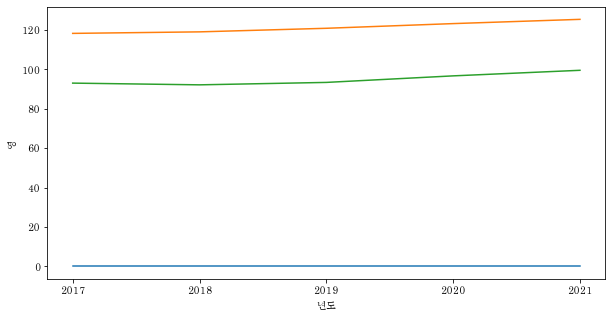

In [31]:
plt.figure(figsize=(10,5))
sns.lineplot(x='년도',y='영',data=df_sangshi_mean)
sns.lineplot(x='년도',y='남자평균근속연수',data=df_sangshi_mean)
sns.lineplot(x='년도',y='여자평균근속연수',data=df_sangshi_mean)
plt.savefig("남녀근속연수_라인.png", dpi = 400)

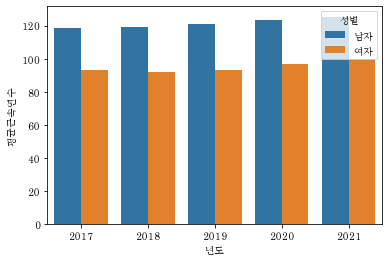

In [32]:
sns.barplot(x='년도',y='평균근속연수',hue='성별',data=df_geunsok_mean)
plt.savefig("남녀근속연수_막대.png", dpi = 400)
plt.show()

In [33]:
df_mean

년도          평균연봉  성별  영
0  2017  68522.694595  남자  0
1  2018  70717.545946  남자  0
2  2019  71542.732432  남자  0
3  2020  73899.770270  남자  0
4  2021  71784.475676  남자  0
5  2017  53678.083784  여자  0
6  2018  55823.040541  여자  0
7  2019  56818.735135  여자  0
8  2020  59325.670270  여자  0
9  2021  58581.440541  여자  0

In [34]:
df_geunsok_mean

년도      평균근속연수  성별  영
0  2017  118.287568  남자  0
1  2018  119.060730  남자  0
2  2019  120.876405  남자  0
3  2020  123.253000  남자  0
4  2021  125.409108  남자  0
5  2017   93.047027  여자  0
6  2018   92.171811  여자  0
7  2019   93.405351  여자  0
8  2020   96.724595  여자  0
9  2021   99.553243  여자  0

In [35]:
df_mean_av = df_mean.drop(['년도','성별','영'],axis=1)


In [36]:
df_geunsok_mean_av = df_geunsok_mean.drop(['년도','성별','영'],axis=1)

In [37]:
df_mean_concat = pd.concat([df_mean_av,df_geunsok_mean_av],axis=1)
df_mean_concat

평균연봉      평균근속연수
0  68522.694595  118.287568
1  70717.545946  119.060730
2  71542.732432  120.876405
3  73899.770270  123.253000
4  71784.475676  125.409108
5  53678.083784   93.047027
6  55823.040541   92.171811
7  56818.735135   93.405351
8  59325.670270   96.724595
9  58581.440541   99.553243

In [38]:
df_corr = df_mean_concat.corr()

In [39]:
df_corr

평균연봉    평균근속연수
평균연봉    1.000000  0.985827
평균근속연수  0.985827  1.000000

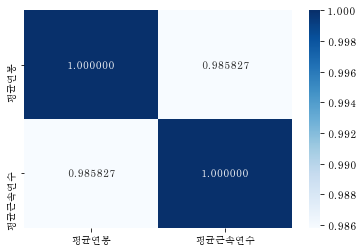

In [40]:
sns.heatmap(df_corr,annot=True,fmt='f',cmap='Blues')
plt.show()

In [41]:
df_mean_concat = df_mean_concat.drop([4,9])
df_mean_concat = df_mean_concat.reset_index(drop=True)

In [42]:
overtime_mean =[
    [12.7],
    [11.9],
    [10.7],
    [9.3],
    [7.0],
    [6.4],
    [5.3],
    [4.6]
                ]
columns = ['초과근로시간']
df_overtime_mean = pd.DataFrame(overtime_mean,columns=columns)
df_overtime_mean


초과근로시간
0    12.7
1    11.9
2    10.7
3     9.3
4     7.0
5     6.4
6     5.3
7     4.6

In [43]:
df_mean_concat = pd.concat([df_mean_concat,df_overtime_mean],axis=1)
df_mean_concat

평균연봉      평균근속연수  초과근로시간
0  68522.694595  118.287568    12.7
1  70717.545946  119.060730    11.9
2  71542.732432  120.876405    10.7
3  73899.770270  123.253000     9.3
4  53678.083784   93.047027     7.0
5  55823.040541   92.171811     6.4
6  56818.735135   93.405351     5.3
7  59325.670270   96.724595     4.6

In [44]:
df_corr = df_mean_concat.corr()
df_corr

평균연봉    평균근속연수    초과근로시간
평균연봉    1.000000  0.988158  0.793845
평균근속연수  0.988158  1.000000  0.864553
초과근로시간  0.793845  0.864553  1.000000

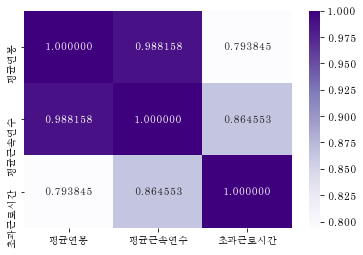

In [45]:
sns.heatmap(df_corr,annot=True,fmt='f',cmap='Purples')
plt.savefig("연봉_근속연수_근로시간_히트맵.png", dpi = 400)
plt.show()

In [46]:
overtime_mean =[
    ['2017',12.7,'남자',0],
    ['2018',11.9,'남자',0],
    ['2019',10.7,'남자',0],
    ['2020',9.3,'남자',0],
    ['2017',7.0,'여자',0],
    ['2018',6.4,'여자',0],
    ['2019',5.3,'여자',0],
    ['2020',4.6,'여자',0]
]
columns = ['년도', '초과근무시간','성별','영']
df_overtime_mean = pd.DataFrame(overtime_mean,columns=columns)
df_overtime_mean

년도  초과근무시간  성별  영
0  2017    12.7  남자  0
1  2018    11.9  남자  0
2  2019    10.7  남자  0
3  2020     9.3  남자  0
4  2017     7.0  여자  0
5  2018     6.4  여자  0
6  2019     5.3  여자  0
7  2020     4.6  여자  0

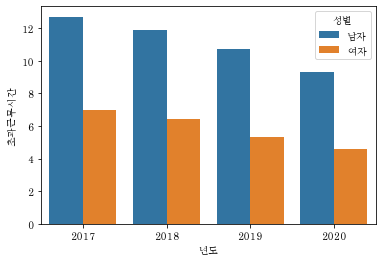

In [47]:
sns.barplot(x='년도',y='초과근무시간',hue='성별',data=df_overtime_mean)
plt.savefig("남녀초과근무시간비교_막대.png", dpi = 400)
plt.show()